In [ ]:
pip install matplotlib

In [8]:


import os, time
from itertools import combinations
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import clear_output

class NonogramSolver:
    def __init__(self, ROWS_VALUES, COLS_VALUES, savepath=''):
        self.ROWS_VALUES = ROWS_VALUES
        self.no_of_rows = len(ROWS_VALUES)
        self.rows_changed = [0] * self.no_of_rows
        self.rows_done = [0] * self.no_of_rows

        self.COLS_VALUES = COLS_VALUES
        self.no_of_cols = len(COLS_VALUES)
        self.cols_changed = [0] * self.no_of_cols
        self.cols_done = [0] * self.no_of_cols

        self.solved = False 
        self.shape = (self.no_of_rows, self.no_of_cols)
        self.board = [[0 for c in range(self.no_of_cols)] for r in range(self.no_of_rows)]
        self.savepath = savepath
        if self.savepath != '': self.n = 0

        # step 1: Defining all possible solutions for every row and col
        self.rows_possibilities = self.create_possibilities(ROWS_VALUES, self.no_of_cols)
        self.cols_possibilities = self.create_possibilities(COLS_VALUES, self.no_of_rows)
        
        while not self.solved:
            # step 2: Order indici by lowest 
            self.lowest_rows = self.select_index_not_done(self.rows_possibilities, 1)
            self.lowest_cols = self.select_index_not_done(self.cols_possibilities, 0)
            self.lowest = sorted(self.lowest_rows + self.lowest_cols, key=lambda element: element[1])

            # step 3: Get only zeroes or only ones of lowest possibility 
            for ind1, _, row_ind in self.lowest:
                if not self.check_done(row_ind, ind1):
                    if row_ind: values = self.rows_possibilities[ind1]
                    else: values = self.cols_possibilities[ind1]
                    same_ind = self.get_only_one_option(values)
                    for ind2, val in same_ind:
                        if row_ind: ri, ci = ind1, ind2
                        else: ri, ci = ind2, ind1 
                        if self.board[ri][ci] == 0:
                            self.board[ri][ci] = val
                            if row_ind: self.cols_possibilities[ci] = self.remove_possibilities(self.cols_possibilities[ci], ri, val)
                            else: self.rows_possibilities[ri] = self.remove_possibilities(self.rows_possibilities[ri], ci, val)
                            clear_output(wait=True)
                            self.display_board()
                            if self.savepath != '':
                                self.save_board()
                                self.n += 1
                    self.update_done(row_ind, ind1)
            self.check_solved()
                    
    def create_possibilities(self, values, no_of_other):
        possibilities = []
        
        for v in values:
            groups = len(v)
            no_empty = no_of_other-sum(v)-groups+1
            ones = [[1]*x for x in v]
            res = self._create_possibilities(no_empty, groups, ones)
            possibilities.append(res)  
        
        return possibilities

    def _create_possibilities(self, n_empty, groups, ones):
        res_opts = []
        for p in combinations(range(groups+n_empty), groups):
            selected = [-1]*(groups+n_empty)
            ones_idx = 0
            for val in p:
                selected[val] = ones_idx
                ones_idx += 1
            res_opt = [ones[val]+[-1] if val > -1 else [-1] for val in selected]
            res_opt = [item for sublist in res_opt for item in sublist][:-1]
            res_opts.append(res_opt)
        return res_opts

    def select_index_not_done(self, possibilities, row_ind):
        s = [len(i) for i in possibilities]
        if row_ind:
            return [(i, n, row_ind) for i, n in enumerate(s) if self.rows_done[i] == 0]
        else:
            return [(i, n, row_ind) for i, n in enumerate(s) if self.cols_done[i] == 0]

    def get_only_one_option(self, values):
        return [(n, np.unique(i)[0]) for n, i in enumerate(np.array(values).T) if len(np.unique(i)) == 1]

    def remove_possibilities(self, possibilities, i, val):
        return [p for p in possibilities if p[i] == val]

    def display_board(self):
        # plt.grid(True, which='both', color='black', linewidth=0.5)
        plt.imshow(self.board, cmap='Greys')
        # 設置 x 和 y 軸的格線
        plt.xticks(range(0, len(self.board)), [])
        plt.yticks(range(0, len(self.board)), [])

        # 添加格線
        plt.grid(True, which='both', color='black', linewidth=1)
        plt.show()



    def save_board(self, increase_size=20):
        name = f'0000000{str(self.n)}'[-8:]
        increased_board = np.zeros(np.array((self.no_of_rows, self.no_of_cols)) * increase_size)
        for j in range(self.no_of_rows):
            for k in range(self.no_of_cols):
                increased_board[j * increase_size : (j+1) * increase_size, k * increase_size : (k+1) * increase_size] = self.board[j][k]
        plt.imsave(os.path.join(self.savepath, f'{name}.jpeg'), increased_board, cmap='Greys', dpi=1000)

    def update_done(self, row_ind, idx):
        if row_ind: vals = self.board[idx]
        else: vals = [row[idx] for row in self.board]
        if 0 not in vals:
            if row_ind: self.rows_done[idx] = 1
            else: self.cols_done[idx] = 1 

    def check_done(self, row_ind, idx):
        if row_ind: return self.rows_done[idx]
        else: return self.cols_done[idx]

    def check_solved(self):
        if 0 not in self.rows_done and 0 not in self.cols_done:
            self.solved = True

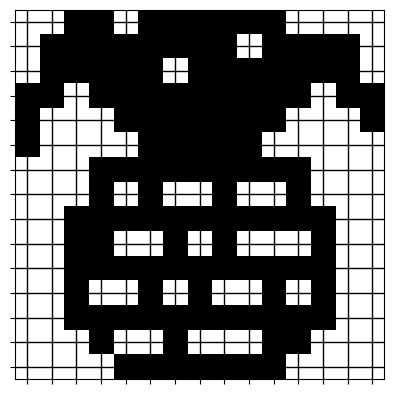

In [9]:
p1 = NonogramSolver(
          [[2,6],[8,4],[5,7],[2,9,2],[1,7,1],[1,5],[9],[1,1,1,1],[11],[2,1,1,1],[11],[1,1,1,1,1],[11],[1,1,2],[7]]
          ,[[3], [3], [3,5], [4,5,2], [4,1,1,1,1,1], [9,3,1], [2,4,3,3], [7,1,3,1], [11,1,1], [1,5,1,1,1,1],[5,1,1,5],[3,3,1,2],[2,5],[3],[2]]
          )